In [1]:
import psycopg2
from Database import Database
conn  = psycopg2.connect(
    user = "postgres",
    password = Database.get_password(),
    host = Database.get_host(),
    port = 5432,
    database="postgres",
)

In [2]:
cursor = conn.cursor()

In [3]:
cursor.execute(""" 
    SELECT * FROM players
    WHERE team_id = 607;
""")

In [4]:
records = cursor.fetchall()

In [5]:
records

[(438897, 4, 'Alexsandro Ribeiro', 24, 'DC', 607),
 (437299, 15, 'Leny Yoro', 18, 'DC', 607),
 (338497, 8, 'Angel Gomes', 23, 'DMC', 607),
 (81662, 31, 'Ismaily', 34, 'DL', 607),
 (43415, 21, 'Benjamin André', 33, 'DMC', 607),
 (85693, 10, 'Rémy Cabella', 33, 'Sub', 607),
 (447025, 22, 'Tiago Santos', 21, 'Sub', 607),
 (482386, 37, 'Amine Messoussa', 19, 'Sub', 607),
 (398299, 30, 'Lucas Chevalier', 22, 'GK', 607),
 (495470, 34, 'Aaron Malouda', 18, 'Sub', 607),
 (469544, 38, 'Ichem Ferrah', 18, 'Sub', 607),
 (363181, 23, 'Edon Zhegrova', 24, 'AMR', 607),
 (438663, 26, 'Alan Virginius', 21, 'Sub', 607),
 (303158, 12, 'Yusuf Yazici', 27, 'AMC', 607),
 (236489, 13, 'Akim Zedadka', 28, 'Sub', 607),
 (137386, 17, 'Ivan Cavaleiro', 30, 'AML', 607),
 (383855, 9, 'Jonathan David', 24, 'FW', 607),
 (273332, 16, 'Adam Jakubech', 27, 'Sub', 607),
 (297577, 11, 'Adam Ounas', 27, 'Sub', 607),
 (504830, 32, 'Ayyoub Bouaddi', 16, 'Sub', 607),
 (366875, 18, 'Bafodé Diakité', 23, 'DR', 607),
 (89931, 

In [6]:
cursor.execute(""" 
    SELECT * FROM match_event
    WHERE player_id = 363181;
""")

In [7]:
records = cursor.fetchall()

In [21]:
hrecords

NameError: name 'head' is not defined

In [9]:
import pandas as pd
import numpy as np

In [10]:
df = pd.DataFrame(records, columns = [desc[0] for desc in cursor.description])

In [11]:
df

,id,event_id,minute,second,team_id,player_id,x,y,end_x,end_y,...,blocked_x,blocked_y,goal_mouth_z,goal_mouth_y,is_shot,card_type,is_goal,type_display_name,outcome_type_display_name,period_display_name
0,2613329825,537,49,55.0,607,363181,52.6,0.1,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,TakeOn,Unsuccessful,SecondHalf
1,2640165965,585,54,34.0,607,363181,69.0,2.7,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,TakeOn,Unsuccessful,SecondHalf
2,2635960103,197,17,3.0,607,363181,74.2,57.9,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,Dispossessed,Successful,FirstHalf
3,2640168927,622,58,5.0,607,363181,66.5,5.1,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,BallTouch,Successful,SecondHalf
4,2617238311,883,90,44.0,607,363181,68.2,2.2,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,Dispossessed,Successful,SecondHalf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,2606997727,548,55,56.0,607,363181,99.2,35.3,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,CornerAwarded,Successful,SecondHalf
1077,2607000303,563,57,47.0,607,363181,86.7,14.4,91.7,43.9,...,NaN,NaN,NaN,NaN,False,False,False,Pass,Unsuccessful,SecondHalf
1078,2607001171,567,58,27.0,607,363181,45.4,5.9,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,Tackle,Successful,SecondHalf
1079,2607007839,614,63,10.0,607,363181,80.4,25.3,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,TakeOn,Unsuccessful,SecondHalf


In [12]:
df["type_display_name"].unique()

array(['TakeOn', 'Dispossessed', 'BallTouch', 'Pass', 'Foul',
       'BallRecovery', 'CornerAwarded', 'SavedShot', 'MissedShots',
       'Interception', 'Challenge', 'Goal', 'Tackle', 'SubstitutionOff',
       'BlockedPass', 'SubstitutionOn', 'Clearance', 'Aerial', 'Card',
       'OffsidePass', 'GoodSkill'], dtype=object)

In [13]:
df_dribbles = df[df["type_display_name"] == "TakeOn"]

In [14]:
df_dribbles

,id,event_id,minute,second,team_id,player_id,x,y,end_x,end_y,...,blocked_x,blocked_y,goal_mouth_z,goal_mouth_y,is_shot,card_type,is_goal,type_display_name,outcome_type_display_name,period_display_name
0,2613329825,537,49,55.0,607,363181,52.6,0.1,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,TakeOn,Unsuccessful,SecondHalf
1,2640165965,585,54,34.0,607,363181,69.0,2.7,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,TakeOn,Unsuccessful,SecondHalf
26,2635961355,231,20,30.0,607,363181,80.6,11.5,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,TakeOn,Successful,FirstHalf
37,2635964373,352,31,48.0,607,363181,93.2,24.8,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,TakeOn,Unsuccessful,FirstHalf
42,2635967611,435,42,4.0,607,363181,82.6,35.3,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,TakeOn,Successful,FirstHalf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,2606926823,138,16,56.0,607,363181,59.4,0.3,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,TakeOn,Unsuccessful,FirstHalf
1040,2606931847,168,20,0.0,607,363181,72.3,10.5,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,TakeOn,Successful,FirstHalf
1058,2606958515,345,39,23.0,607,363181,71.2,38.7,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,TakeOn,Unsuccessful,FirstHalf
1071,2606994223,511,53,7.0,607,363181,33.8,19.1,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,TakeOn,Successful,SecondHalf


In [15]:
df_dribbles["outcome_type_display_name"].value_counts()

Successful      55
Unsuccessful    53
Name: outcome_type_display_name, dtype: int64

In [16]:
from mplsoccer import Pitch, VerticalPitch
import matplotlib.colors as mcolors
import matplotlib as mpl
import matplotlib.pyplot as plt

In [17]:
from PIL import Image
import urllib
import matplotlib.lines as mlines

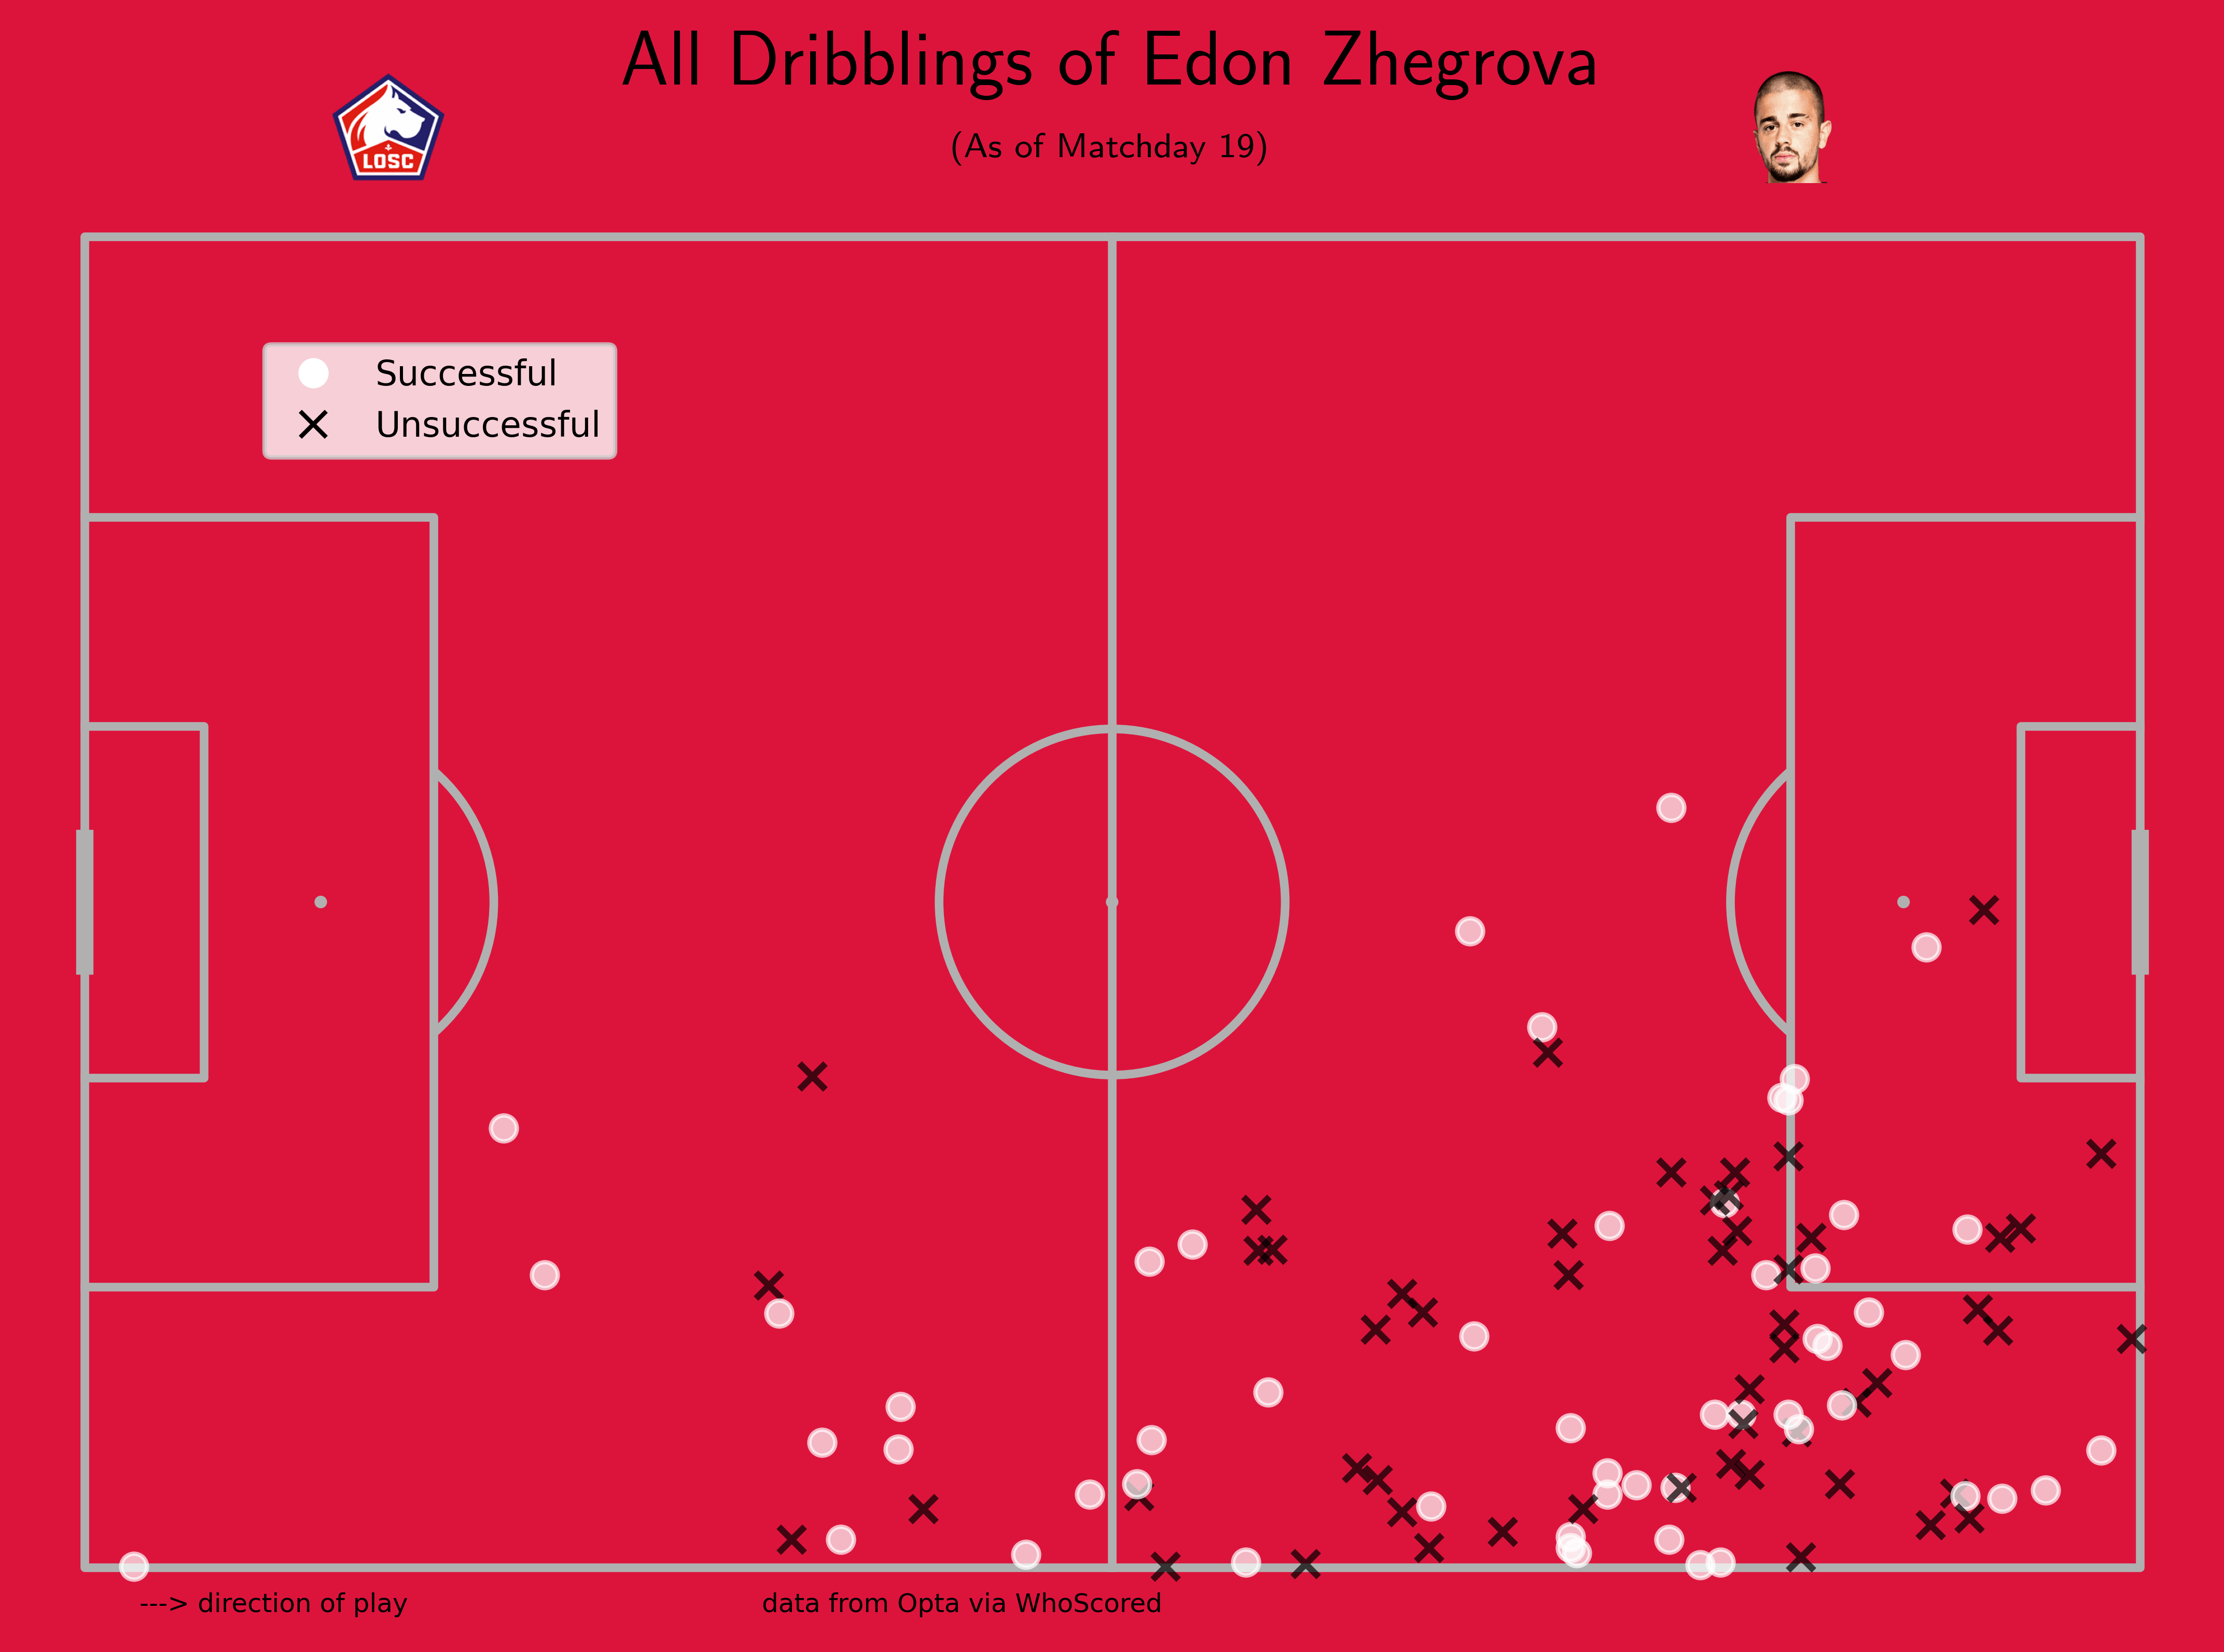

In [18]:
fig, ax = plt.subplots(figsize=(10, 6), dpi= 600)


pitch = Pitch(pitch_type='opta', half=False)

pitch.draw(ax=ax, tight_layout=True, constrained_layout=True)

fig.set_facecolor('#DC143C')
ax.patch.set_facecolor('#DC143C')


title_text = r'\fontsize{18pt}{3em}\selectfont{}All Dribblings of Edon Zhegrova\\' + '\n' + r'\fontsize{8pt}{3em}\selectfont{}(As of Matchday 19)'
title = ax.set_title(title_text, fontstyle="italic", fontsize=16, fontweight='normal', usetex=True)


fotmob_url = 'https://images.fotmob.com/image_resources/playerimages/'
player_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{862616:.0f}.png'))
fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{8639:.0f}.png'))
logo_ax = fig.add_axes([ax.title.get_position()[0]-0.25,ax.title.get_position()[1]-0.12, 0.06, 0.06], anchor = "C")
logo_ax.imshow(club_icon)
logo_ax.axis("off")
player_logo_ax = fig.add_axes([ax.title.get_position()[0]+0.2,ax.title.get_position()[1]-0.12, 0.06, 0.06], anchor = "C")
player_logo_ax.imshow(player_icon)
player_logo_ax.axis("off")

for index, row in df_dribbles.iterrows():
    if row["outcome_type_display_name"] == "Successful":
        pitch.scatter(row['x'], row['y'], c='white', alpha=.7,ax=ax)
    else:
        pitch.scatter(row['x'], row['y'], c='black', alpha=.7,ax=ax, marker = "x")



successful_outcome_circle = mlines.Line2D([0], [0], color='white', marker='o', linestyle='None', label='Successful Dribble')
unsuccessful_outcome_circle = mlines.Line2D([0], [0], color='black', marker='x', linestyle='None', label='Unsuccessful Dribble')

legend_handles = [successful_outcome_circle, unsuccessful_outcome_circle]
legend_labels = ['Successful', 'Unsuccessful']

ax.legend(legend_handles, legend_labels, fontsize= 8,bbox_to_anchor=(0.1, 0.9))


fig.text(0.2,0.115,"---> direction of play", fontsize=6, color='black', usetex = False)
fig.text(0.4,0.115,"data from Opta via WhoScored", fontsize=6, color='black')


plt.savefig(
	"Zhegrova_dribblings.png",
	dpi = 600,
	bbox_inches="tight",
    edgecolor="none",
)